In [3]:
from hunt.tournament import Tournament
from hunt.game import DesignGame, Player
from hunt.player import RandomPlayer, MirrorPlayer

t = Tournament(
    players = [Player, RandomPlayer, MirrorPlayer],
    games = [
        DesignGame([[[2,3],[0,4]]]),
        
        DesignGame([
            [[0,0],[0,4]],
            [[1,1],[1.5,3.5]],
            [[1,1],[0,2]],
            [[2,3],[0,0]]
        ])
    ],
    num_reps=200
)
print(t.run())

{'null': 1.0849999999999997, 'random': 1.437291666666666, 'mirror': 1.765416666666667}


In [4]:
from hunt.tournament import Tournament
from hunt.game import DesignGame, Player
from hunt.player import RandomPlayer, MirrorPlayer

from players import RiskAwareRDplayer_averse1, RiskAwareRDplayer_averse2
from players import RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2

from players import RiskAwareRDplayer_neutral


from players import RiskAwareEUplayer_averse1, RiskAwareEUplayer_averse2
from players import RiskAwareEUplayer_seeker1, RiskAwareEUplayer_seeker2
from players import RiskAwareEUplayer_neutral

import pandas as pd

data = pd.read_csv("single_level_payoffs.csv")

single_level_games = data.apply(
    lambda r: DesignGame(
        [
            [
                [r.payoff_defect, r.payoff_defect],
                [r.payoff_downside, r.payoff_upside]
            ]
        ]
    ), 
    axis=1
)

t_RD = Tournament(
    players = [RiskAwareRDplayer_neutral,
               RiskAwareRDplayer_averse1,  RiskAwareRDplayer_averse2, 
               RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2],
    games = single_level_games,
    num_reps=1
)

t_EU = Tournament(
    players = [RiskAwareEUplayer_neutral,
              RiskAwareEUplayer_averse1, RiskAwareEUplayer_averse2,
              RiskAwareEUplayer_seeker1, RiskAwareEUplayer_seeker2],
    games = single_level_games,
    num_reps=1
)

t_EU_RD = Tournament(
    players = [RiskAwareEUplayer_neutral, RiskAwareRDplayer_neutral],
    games = single_level_games,
    num_reps=1
)


print(t_RD.run())
print(t_EU.run())
print(t_EU_RD.run())

{'RD_neutral': 55.97931034482761, 'RD_averse1': 54.310344827586235, 'RD_averse2': 52.758620689655196, 'RD_seeker1': 52.92413793103451, 'RD_seeker2': 29.393103448275866}
{'EU_neutral': 56.39310344827589, 'EU_averse1': 52.758620689655196, 'EU_averse2': 54.310344827586235, 'EU_seeker1': 56.39310344827589, 'EU_seeker2': 56.39310344827589}
{'EU_neutral': 59.65517241379313, 'RD_neutral': 59.65517241379313}


In [5]:
t_RD = Tournament(
    players = [RiskAwareRDplayer_neutral,
               RiskAwareRDplayer_averse1,  RiskAwareRDplayer_averse2, 
               RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2],
    games = single_level_games,
    num_reps=1
)

print(t_RD.run())

import csv
with open('SL_results.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["game", "rep", "player_1_name", "player_1_design", "player_1_strategy", "player_2_name", "player_2_design", "player_2_strategy"])
    for row in t_RD.rep_results:
        spamwriter.writerow([
            row["game"], 
            row["rep"], 
            row["player_1"]["name"], 
            row["player_1"]["design"], 
            row["player_1"]["strategy"],
            row["player_2"]["name"], 
            row["player_2"]["design"], 
            row["player_2"]["strategy"]
        ])

{'RD_neutral': 55.97931034482761, 'RD_averse1': 54.310344827586235, 'RD_averse2': 52.758620689655196, 'RD_seeker1': 52.92413793103451, 'RD_seeker2': 29.393103448275866}


In [6]:
import pandas as pd

#1--for risk_neutral versus risk_neutral:
  
df=pd.read_csv(r"SL_results.csv")

#1--for risk_neutral versus risk_neutral:

NN_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NN_CC = (NN_CC_df['player_1_strategy']==1).sum()
print('NN_CC=', NN_CC)

NN_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NN_CD = (NN_CD_df['player_1_strategy']==1).sum()
print('NN_CD=', NN_CD)

NN_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NN_DD = (NN_DD_df['player_1_strategy']==0).sum()
print('NN_DD=', NN_DD)

NN_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NN_DC = (NN_DC_df['player_1_strategy']==0).sum()
print('NN_DC=', NN_DC)

NN_CC_per = "{:.2f}".format((NN_CC*100)/29)
print("NN_CC_per=", NN_CC_per, '%')
NN_CD_per = "{:.2f}".format((NN_CD*100)/29)
print("NN_CD_per=", NN_CD_per, '%')
NN_DD_per = "{:.2f}".format((NN_DD*100)/29)
print("NN_DD_per=", NN_DD_per, '%')
NN_DC_per = "{:.2f}".format((NN_DC*100)/29)
print("NN_DC_per=", NN_DC_per, '%')
print("")

#2--for risk_neutral versus risk_averse1:

NA1_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NA1_CC = (NA1_CC_df['player_1_strategy']==1).sum()
print('NA1_CC=', NA1_CC)

NA1_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NA1_CD = (NA1_CD_df['player_1_strategy']==1).sum()
print('NA1_CD=', NA1_CD)

NA1_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NA1_DD = (NA1_DD_df['player_1_strategy']==0).sum()
print('NA1_DD=', NA1_DD)

NA1_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NA1_DC = (NA1_DC_df['player_1_strategy']==0).sum()
print('NA1_DC=', NA1_DC)

NA1_CC_per = "{:.2f}".format((NA1_CC*100)/29)
print("NA1_CC_per=", NA1_CC_per, '%')
NA1_CD_per = "{:.2f}".format((NA1_CD*100)/29)
print("NA1_CD_per=", NA1_CD_per, '%')
NA1_DD_per = "{:.2f}".format((NA1_DD*100)/29)
print("NA1_DD_per=", NA1_DD_per, '%')
NA1_DC_per = "{:.2f}".format((NA1_DC*100)/29)
print("NA1_DC_per=", NA1_DC_per, '%')
print("")

#3--for risk_neutral versus risk_averse2:

NA2_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NA2_CC = (NA2_CC_df['player_1_strategy']==1).sum()
print('NA2_CC=', NA2_CC)

NA2_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NA2_CD = (NA2_CD_df['player_1_strategy']==1).sum()
print('NA2_CD=', NA2_CD)

NA2_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NA2_DD = (NA2_DD_df['player_1_strategy']==0).sum()
print('NA2_DD=', NA2_DD)

NA2_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NA2_DC = (NA2_DC_df['player_1_strategy']==0).sum()
print('NA2_DC=', NA2_DC)

NA2_CC_per = "{:.2f}".format((NA2_CC*100)/29)
print("NA2_CC_per=", NA2_CC_per, '%')
NA2_CD_per = "{:.2f}".format((NA2_CD*100)/29)
print("NA2_CD_per=", NA2_CD_per, '%')
NA2_DD_per = "{:.2f}".format((NA2_DD*100)/29)
print("NA2_DD_per=", NA2_DD_per, '%')
NA2_DC_per = "{:.2f}".format((NA2_DC*100)/29)
print("NA2_DC_per=", NA2_DC_per, '%')
print("")

#4--for risk_neutral versus risk_seeker1:

NS1_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NS1_CC = (NS1_CC_df['player_1_strategy']==1).sum()
print('NS1_CC=', NS1_CC)

NS1_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NS1_CD = (NS1_CD_df['player_1_strategy']==1).sum()
print('NS1_CD=', NS1_CD)

NS1_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NS1_DD = (NS1_DD_df['player_1_strategy']==0).sum()
print('NS1_DD=', NS1_DD)

NS1_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NS1_DC = (NS1_DC_df['player_1_strategy']==0).sum()
print('NS1_DC=', NS1_DC)

NS1_CC_per = "{:.2f}".format((NS1_CC*100)/29)
print("NS1_CC_per=", NS1_CC_per, '%')
NS1_CD_per = "{:.2f}".format((NS1_CD*100)/29)
print("NS1_CD_per=", NS1_CD_per, '%')
NS1_DD_per = "{:.2f}".format((NS1_DD*100)/29)
print("NS1_DD_per=", NS1_DD_per, '%')
NS1_DC_per = "{:.2f}".format((NS1_DC*100)/29)
print("NS1_DC_per=", NS1_DC_per, '%')
print("")

#5--for risk_neutral versus risk_seeker2:

NS2_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NS2_CC = (NS2_CC_df['player_1_strategy']==1).sum()
print('NS2_CC=', NS2_CC)

NS2_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NS2_CD = (NS2_CD_df['player_1_strategy']==1).sum()
print('NS2_CD=', NS2_CD)

NS2_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NS2_DD = (NS2_DD_df['player_1_strategy']==0).sum()
print('NS2_DD=', NS2_DD)

NS2_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NS2_DC = (NS2_DC_df['player_1_strategy']==0).sum()
print('NS2_DC=', NS2_DC)

NS2_CC_per = "{:.2f}".format((NS2_CC*100)/29)
print("NS2_CC_per=", NS2_CC_per, '%')
NS2_CD_per = "{:.2f}".format((NS2_CD*100)/29)
print("NS2_CD_per=", NS2_CD_per, '%')
NS2_DD_per = "{:.2f}".format((NS2_DD*100)/29)
print("NS2_DD_per=", NS2_DD_per, '%')
NS2_DC_per = "{:.2f}".format((NS2_DC*100)/29)
print("NS2_DC_per=", NS2_DC_per, '%')
print("")

#6--for risk_averse1 versus risk_averse1:

A1A1_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1A1_CC = (A1A1_CC_df['player_1_strategy']==1).sum()
print('A1A1_CC=', A1A1_CC)

A1A1_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1A1_CD = (A1A1_CD_df['player_1_strategy']==1).sum()
print('A1A1_CD=', A1A1_CD)

A1A1_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1A1_DD = (A1A1_DD_df['player_1_strategy']==0).sum()
print('A1A1_DD=', A1A1_DD)

A1A1_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1A1_DC = (A1A1_DC_df['player_1_strategy']==0).sum()
print('A1A1_DC=', A1A1_DC)

A1A1_CC_per = "{:.2f}".format((A1A1_CC*100)/29)
print("A1A1_CC_per=", A1A1_CC_per, '%')
A1A1_CD_per = "{:.2f}".format((A1A1_CD*100)/29)
print("A1A1_CD_per=", A1A1_CD_per, '%')
A1A1_DD_per = "{:.2f}".format((A1A1_DD*100)/29)
print("A1A1_DD_per=", A1A1_DD_per, '%')
A1A1_DC_per = "{:.2f}".format((A1A1_DC*100)/29)
print("A1A1_DC_per=", A1A1_DC_per, '%')
print("")

#7--for risk_averse1 versus risk_averse2:

A1A2_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1A2_CC = (A1A1_CC_df['player_1_strategy']==1).sum()
print('A1A2_CC=', A1A2_CC)

A1A2_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1A2_CD = (A1A2_CD_df['player_1_strategy']==1).sum()
print('A1A2_CD=', A1A2_CD)

A1A2_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1A2_DD = (A1A2_DD_df['player_1_strategy']==0).sum()
print('A1A2_DD=', A1A2_DD)

A1A2_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1A2_DC = (A1A2_DC_df['player_1_strategy']==0).sum()
print('A1A2_DC=', A1A2_DC)

A1A2_CC_per = "{:.2f}".format((A1A2_CC*100)/29)
print("A1A2_CC_per=", A1A2_CC_per, '%')
A1A2_CD_per = "{:.2f}".format((A1A2_CD*100)/29)
print("A1A2_CD_per=", A1A2_CD_per, '%')
A1A2_DD_per = "{:.2f}".format((A1A2_DD*100)/29)
print("A1A2_DD_per=", A1A2_DD_per, '%')
A1A2_DC_per = "{:.2f}".format((A1A2_DC*100)/29)
print("A1A2_DC_per=", A1A2_DC_per, '%')
print("")

#8--for risk_averse1 versus risk_seeker1:

A1S1_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1S1_CC = (A1S1_CC_df['player_1_strategy']==1).sum()
print('A1S1_CC=', A1S1_CC)

A1S1_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1S1_CD = (A1S1_CD_df['player_1_strategy']==1).sum()
print('A1S1_CD=', A1S1_CD)

A1S1_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1S1_DD = (A1S1_DD_df['player_1_strategy']==0).sum()
print('A1S1_DD=', A1S1_DD)

A1S1_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1S1_DC = (A1S1_DC_df['player_1_strategy']==0).sum()
print('A1S1_DC=', A1S1_DC)

A1S1_CC_per = "{:.2f}".format((A1S1_CC*100)/29)
print("A1S1_CC_per=", A1S1_CC_per, '%')
A1S1_CD_per = "{:.2f}".format((A1S1_CD*100)/29)
print("A1S1_CD_per=", A1S1_CD_per, '%')
A1S1_DD_per = "{:.2f}".format((A1S1_DD*100)/29)
print("A1S1_DD_per=", A1S1_DD_per, '%')
A1S1_DC_per = "{:.2f}".format((A1S1_DC*100)/29)
print("A1S1_DC_per=", A1S1_DC_per, '%')
print("")

#9--for risk_averse1 versus risk_seeker2:

A1S2_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1S2_CC = (A1S2_CC_df['player_1_strategy']==1).sum()
print('A1S2_CC=', A1S2_CC)

A1S2_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1S2_CD = (A1S2_CD_df['player_1_strategy']==1).sum()
print('A1S2_CD=', A1S2_CD)

A1S2_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1S2_DD = (A1S1_DD_df['player_1_strategy']==0).sum()
print('A1S2_DD=', A1S2_DD)

A1S2_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1S2_DC = (A1S2_DC_df['player_1_strategy']==0).sum()
print('A1S2_DC=', A1S2_DC)

A1S2_CC_per = "{:.2f}".format((A1S2_CC*100)/29)
print("A1S2_CC_per=", A1S2_CC_per, '%')
A1S2_CD_per = "{:.2f}".format((A1S2_CD*100)/29)
print("A1S2_CD_per=", A1S2_CD_per, '%')
A1S2_DD_per = "{:.2f}".format((A1S2_DD*100)/29)
print("A1S2_DD_per=", A1S2_DD_per, '%')
A1S2_DC_per = "{:.2f}".format((A1S2_DC*100)/29)
print("A1S2_DC_per=", A1S2_DC_per, '%')
print("")

#10--for risk_averse2 versus risk_averse2:

A2A2_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2A2_CC = (A2A2_CC_df['player_1_strategy']==1).sum()
print('A2A2_CC=', A2A2_CC)

A2A2_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2A2_CD = (A2A2_CD_df['player_1_strategy']==1).sum()
print('A2A2_CD=', A2A2_CD)

A2A2_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2A2_DD = (A2A2_DD_df['player_1_strategy']==0).sum()
print('A2A2_DD=', A2A2_DD)

A2A2_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2A2_DC = (A2A2_DC_df['player_1_strategy']==0).sum()
print('A2A2_DC=', A2A2_DC)

A2A2_CC_per = "{:.2f}".format((A2A2_CC*100)/29)
print("A2A2_CC_per=", A2A2_CC_per, '%')
A2A2_CD_per = "{:.2f}".format((A2A2_CD*100)/29)
print("A2A2_CD_per=", A2A2_CD_per, '%')
A2A2_DD_per = "{:.2f}".format((A2A2_DD*100)/29)
print("A2A2_DD_per=", A2A2_DD_per, '%')
A2A2_DC_per = "{:.2f}".format((A2A2_DC*100)/29)
print("A2A2_DC_per=", A2A2_DC_per, '%')
print("")

#11--for risk_averse2 versus risk_seeker1:

A2S1_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2S1_CC = (A2S1_CC_df['player_1_strategy']==1).sum()
print('A2S1_CC=', A2S1_CC)

A2S1_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2S1_CD = (A2S1_CD_df['player_1_strategy']==1).sum()
print('A2S1_CD=', A2S1_CD)

A2S1_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2S1_DD = (A2S1_DD_df['player_1_strategy']==0).sum()
print('A2S1_DD=', A2S1_DD)

A2S1_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2S1_DC = (A2S1_DC_df['player_1_strategy']==0).sum()
print('A2S1_DC=', A2S1_DC)

A2S1_CC_per = "{:.2f}".format((A2S1_CC*100)/29)
print("A2S1_CC_per=", A2S1_CC_per, '%')
A2S1_CD_per = "{:.2f}".format((A2S1_CD*100)/29)
print("A2S1_CD_per=", A2S1_CD_per, '%')
A2S1_DD_per = "{:.2f}".format((A2S1_DD*100)/29)
print("A2S1_DD_per=", A2S1_DD_per, '%')
A2S1_DC_per = "{:.2f}".format((A2S1_DC*100)/29)
print("A2S1_DC_per=", A2S1_DC_per, '%')
print("")

#12--for risk_averse2 versus risk_seeker2:

A2S2_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2S2_CC = (A2S2_CC_df['player_1_strategy']==1).sum()
print('A2S2_CC=', A2S2_CC)

A2S2_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2S2_CD = (A2S2_CD_df['player_1_strategy']==1).sum()
print('A2S2_CD=', A2S2_CD)

A2S2_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2S2_DD = (A2S2_DD_df['player_1_strategy']==0).sum()
print('A2S2_DD=', A2S2_DD)

A2S2_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2S2_DC = (A2S2_DC_df['player_1_strategy']==0).sum()
print('A2S2_DC=', A2S2_DC)

A2S2_CC_per = "{:.2f}".format((A2S2_CC*100)/29)
print("A2S2_CC_per=", A2S2_CC_per, '%')
A2S2_CD_per = "{:.2f}".format((A2S2_CD*100)/29)
print("A2S2_CD_per=", A2S2_CD_per, '%')
A2S2_DD_per = "{:.2f}".format((A2S2_DD*100)/29)
print("A2S2_DD_per=", A2S2_DD_per, '%')
A2S2_DC_per = "{:.2f}".format((A2S2_DC*100)/29)
print("A2S2_DC_per=", A2S2_DC_per, '%')
print("")

#13--for risk_seeker1 versus risk_seeker1:

S1S1_CC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S1S1_CC = (S1S1_CC_df['player_1_strategy']==1).sum()
print('S1S1_CC=', S1S1_CC)

S1S1_CD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S1S1_CD = (S1S1_CD_df['player_1_strategy']==1).sum()
print('S1S1_CD=', S1S1_CD)

S1S1_DD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S1S1_DD = (S1S1_DD_df['player_1_strategy']==0).sum()
print('S1S1_DD=', S1S1_DD)

S1S1_DC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S1S1_DC = (S1S1_DC_df['player_1_strategy']==0).sum()
print('S1S1_DC=', S1S1_DC)

S1S1_CC_per = "{:.2f}".format((S1S1_CC*100)/29)
print("S1S1_CC_per=", S1S1_CC_per, '%')
S1S1_CD_per = "{:.2f}".format((S1S1_CD*100)/29)
print("S1S1_CD_per=", S1S1_CD_per, '%')
S1S1_DD_per = "{:.2f}".format((S1S1_DD*100)/29)
print("S1S1_DD_per=", S1S1_DD_per, '%')
S1S1_DC_per = "{:.2f}".format((S1S1_DC*100)/29)
print("S1S1_DC_per=", S1S1_DC_per, '%')
print("")

#14--for risk_seeker1 versus risk_seeker2:

S1S2_CC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S1S2_CC = (S1S2_CC_df['player_1_strategy']==1).sum()
print('S1S2_CC=', S1S2_CC)

S1S2_CD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S1S2_CD = (S1S2_CD_df['player_1_strategy']==1).sum()
print('S1S2_CD=', S1S2_CD)

S1S2_DD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S1S2_DD = (S1S2_DD_df['player_1_strategy']==0).sum()
print('S1S2_DD=', S1S2_DD)

S1S2_DC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S1S2_DC = (S1S2_DC_df['player_1_strategy']==0).sum()
print('S1S2_DC=', S1S2_DC)

S1S2_CC_per = "{:.2f}".format((S1S2_CC*100)/29)
print("S1S2_CC_per=", S1S2_CC_per, '%')
S1S2_CD_per = "{:.2f}".format((S1S2_CD*100)/29)
print("S1S2_CD_per=", S1S2_CD_per, '%')
S1S2_DD_per = "{:.2f}".format((S1S2_DD*100)/29)
print("S1S2_DD_per=", S1S2_DD_per, '%')
S1S2_DC_per = "{:.2f}".format((S1S2_DC*100)/29)
print("S1S2_DC_per=", S1S2_DC_per, '%')
print("")

#15--for risk_seeker2 versus risk_seeker2:

S2S2_CC_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S2S2_CC = (S2S2_CC_df['player_1_strategy']==1).sum()
print('S2S2_CC=', S2S2_CC)

S2S2_CD_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S2S2_CD = (S2S2_CD_df['player_1_strategy']==1).sum()
print('S2S2_CD=', S2S2_CD)

S2S2_DD_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S2S2_DD = (S2S2_DD_df['player_1_strategy']==0).sum()
print('S2S2_DD=', S2S2_DD)

S2S2_DC_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S2S2_DC = (S2S2_DC_df['player_1_strategy']==0).sum()
print('S2S2_DC=', S2S2_DC)

S2S2_CC_per = "{:.2f}".format((S2S2_CC*100)/29)
print("S2S2_CC_per=", S2S2_CC_per, '%')
S2S2_CD_per = "{:.2f}".format((S2S2_CD*100)/29)
print("S2S2_CD_per=", S2S2_CD_per, '%')
S2S2_DD_per = "{:.2f}".format((S2S2_DD*100)/29)
print("S2S2_DD_per=", S2S2_DD_per, '%')
S2S2_DC_per = "{:.2f}".format((S2S2_DC*100)/29)
print("S2S2_DC_per=", S2S2_DC_per, '%')
print("")

NN_CC= 14
NN_CD= 0
NN_DD= 15
NN_DC= 0
NN_CC_per= 48.28 %
NN_CD_per= 0.00 %
NN_DD_per= 51.72 %
NN_DC_per= 0.00 %

NA1_CC= 7
NA1_CD= 7
NA1_DD= 15
NA1_DC= 0
NA1_CC_per= 24.14 %
NA1_CD_per= 24.14 %
NA1_DD_per= 51.72 %
NA1_DC_per= 0.00 %

NA2_CC= 4
NA2_CD= 10
NA2_DD= 15
NA2_DC= 0
NA2_CC_per= 13.79 %
NA2_CD_per= 34.48 %
NA2_DD_per= 51.72 %
NA2_DC_per= 0.00 %

NS1_CC= 14
NS1_CD= 0
NS1_DD= 8
NS1_DC= 7
NS1_CC_per= 48.28 %
NS1_CD_per= 0.00 %
NS1_DD_per= 27.59 %
NS1_DC_per= 24.14 %

NS2_CC= 14
NS2_CD= 0
NS2_DD= 0
NS2_DC= 15
NS2_CC_per= 48.28 %
NS2_CD_per= 0.00 %
NS2_DD_per= 0.00 %
NS2_DC_per= 51.72 %

A1A1_CC= 7
A1A1_CD= 3
A1A1_DD= 22
A1A1_DC= 0
A1A1_CC_per= 24.14 %
A1A1_CD_per= 10.34 %
A1A1_DD_per= 75.86 %
A1A1_DC_per= 0.00 %

A1A2_CC= 7
A1A2_CD= 3
A1A2_DD= 22
A1A2_DC= 0
A1A2_CC_per= 24.14 %
A1A2_CD_per= 10.34 %
A1A2_DD_per= 75.86 %
A1A2_DC_per= 0.00 %

A1S1_CC= 7
A1S1_CD= 0
A1S1_DD= 8
A1S1_DC= 14
A1S1_CC_per= 24.14 %
A1S1_CD_per= 0.00 %
A1S1_DD_per= 27.59 %
A1S1_DC_per= 48.28 %

A1S2_CC= 7
A1S2

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matrix =np.array([
        [A2S2_DD_per, A2S2_CD_per, A1S2_DD_per, A1S2_CD_per, NS2_DD_per, NS2_CD_per, S1S2_DD_per, S1S2_CD_per, S2S2_DD_per, S2S2_DC_per],
        [A2S2_DC_per, A2S2_CC_per, A1S2_DC_per, A1S2_CC_per, NS2_DC_per, NS2_CC_per, S1S2_DC_per, S1S2_CC_per, S2S2_CD_per, S2S2_CC_per],
        [A2S1_DD_per, A2S1_CD_per, A1S1_DD_per, A1S1_CD_per, NS1_DD_per, NS1_CD_per, S1S1_DD_per, S1S1_DC_per, S1S2_DD_per, S1S2_DC_per],
        [A2S1_DC_per, A2S1_CC_per, A1S1_DC_per, A1S1_CC_per, NS1_DC_per, NS1_CC_per, S1S1_CD_per, S1S1_CC_per, S1S2_CD_per, S1S2_CC_per],
        [NA2_DD_per, NA2_DC_per, NA1_DD_per, NA1_DC_per, NN_DD_per, NN_DC_per, NS1_DD_per, NS1_DC_per, NS2_DD_per, NS2_DC_per],
        [NA2_CD_per, NA2_CC_per, NA1_CD_per, NA1_CC_per, NN_CD_per, NN_CC_per, NS1_CD_per, NS1_CC_per, NS2_CD_per, NS2_CC_per],
        [A1A2_DD_per, A2A2_CD_per, A1A1_DD_per, A1A1_CD_per, NA1_DD_per, NA1_CD_per, A1S1_DD_per, A1S1_DC_per, A1S2_DD_per, A1S2_DC_per],
        [A1A2_DC_per, A1A2_CC_per, A1A1_DC_per, A1A1_CC_per, NA1_DC_per, NA1_CC_per, A1S1_CD_per, A1S1_CC_per, A1S2_CD_per, A1S2_CC_per],
        [A2A2_DD_per, A2A2_CD_per, A1A2_DD_per, A1A2_CD_per, NA2_DD_per, NA2_CD_per, A2S1_DD_per, A2S1_DC_per, A2S2_DD_per, A2S2_DC_per],
        [A2A2_DC_per, A2A2_CC_per, A1A2_DC_per, A1A2_CC_per, NA2_DC_per, NA2_CC_per, A2S1_CD_per, A2S1_CC_per, A2S2_CD_per, A2S2_CC_per]
]).astype(float)

x_axis_names = ['A2-D','A2-C','A1-D','A1-C','N-D','N-C','S1-D','S1-C','S2-D','S2-C']
y_axis_names = ['S2-D','S2-C','S1-D','S1-C','N-D','N-C','A1-D','A1-C','A2-D','A2-C']


print(matrix)





[[  0.     0.    27.59   0.     0.     0.     0.     0.     0.     0.  ]
 [ 86.21  13.79  75.86  24.14  51.72  48.28  27.59  72.41   0.   100.  ]
 [ 27.59   0.    27.59   0.    27.59   0.    27.59   0.     0.    27.59]
 [ 58.62  13.79  48.28  24.14  24.14  48.28   0.    72.41   0.    72.41]
 [ 51.72   0.    51.72   0.    51.72   0.    27.59  24.14   0.    51.72]
 [ 34.48  13.79  24.14  24.14   0.    48.28   0.    48.28   0.    48.28]
 [ 75.86   0.    75.86  10.34  51.72  24.14  27.59  48.28  27.59  75.86]
 [  0.    24.14   0.    24.14   0.    24.14   0.    24.14   0.    24.14]
 [ 86.21   0.    75.86  10.34  51.72  34.48  27.59  58.62   0.    86.21]
 [  0.    13.79   0.    24.14   0.    13.79   0.    13.79   0.    13.79]]


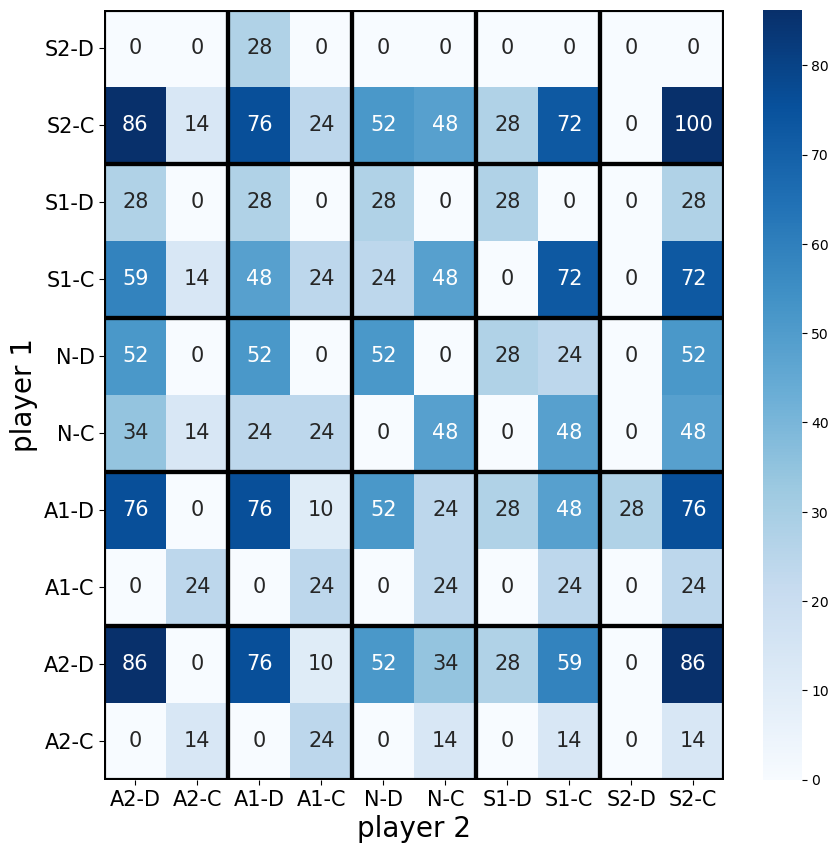

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

filename_output = "single_level_tournament_results.png"

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, annot_kws = {'size':15}, fmt=".0f", linewidths=0, ax=ax, cmap='Blues', robust=True)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(x_axis_names))+0.5)
ax.set_xticklabels(x_axis_names, fontsize = 15)
ax.set_xlabel('player 2', fontsize = 20) # X label

ax.tick_params(axis='y', rotation=90)

ax.set_yticks(np.arange(len(y_axis_names))+0.5)
ax.set_yticklabels(y_axis_names, fontsize = 15,  rotation=360, va='center_baseline')
ax.set_ylabel('player 1', fontsize = 20.0) # Y label
ax.add_patch(Rectangle((0,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,0), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,2), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,4), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,6), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,8), 2, 2, fill=False, edgecolor='black', lw=3))

fig.savefig(filename_output, dpi = 100, bbox_inches = 'tight')  

In [10]:
import pandas as pd

#1--for risk_neutral versus risk_neutral:
  
df=pd.read_csv(r"SL_results.csv")
dfn = df[df['player_1_name'] == 'RD_neutral']
dfn_n = dfn[dfn['player_2_name'] == 'RD_neutral']

#NN_Game_N1_dependent = neutral versus neutral game, player neutral1, dependent startegy frequency

NN_Game_N1_dependent = (dfn_n['player_1_strategy']==1).sum()
NN_Game_N1_independent = (dfn_n['player_1_strategy']==0).sum()

NN_Game_N1_dependent_percentage = (NN_Game_N1_dependent*100)/290
NN_Game_N1_independent_percentage = (NN_Game_N1_independent*100)/290

NN_Game_N2_dependent = (dfn_n['player_2_strategy']==1).sum()
NN_Game_N2_independent = (dfn_n['player_2_strategy']==0).sum()

NN_Game_N2_dependent_percentage = (NN_Game_N2_dependent*100)/290
NN_Game_N2_independent_percentage = (NN_Game_N2_independent*100)/290
  
#print(df2)
print("risk_neutral versus risk_neutral")
print("neutral1 dependent frequency= ", NN_Game_N1_dependent, "/290", ", %",NN_Game_N1_dependent_percentage)
print("neutral1 independent frequency= ", NN_Game_N1_independent, "/290", ", %",NN_Game_N1_independent_percentage)
print("neutral2 dependent frequency= ", NN_Game_N2_dependent, "/290", ", %",NN_Game_N2_dependent_percentage)
print("neutral2 independent frequency= ", NN_Game_N2_independent, "/290", ", %",NN_Game_N2_independent_percentage)
print("")


risk_neutral versus risk_neutral
neutral1 dependent frequency=  14 /290 , % 4.827586206896552
neutral1 independent frequency=  15 /290 , % 5.172413793103448
neutral2 dependent frequency=  14 /290 , % 4.827586206896552
neutral2 independent frequency=  15 /290 , % 5.172413793103448

